# Optimizing your chances of winning Lotto

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Introduction

## Analytical Solution

In [2]:
def count_comb(A, b):
    assert A > 0
    assert b > 0
    assert A != b
    # comb = math.factorial(A) / (math.factorial(b) * math.factorial(A - b))
    comb = math.comb(A, b)
    return comb

def binomial_mu(L, s):
    mu = 1 / count_comb(L, s)
    return mu

def binomial_proba(N, mu, x):
    p = count_comb(N, x) * mu ** x * (1 - mu) ** (N - x)
    return p

In [12]:
def exp_post_tax_prize(N, mu, Z, t, e, top_k = 10):
    probas = [binomial_proba(N, mu, x_n) for x_n in range(1, top_k+1)]
    # print(probas)
    exp = [p / x_n for p, x_n in zip (probas, range(1, top_k+1))]    
     
    p_sum = sum(exp) * Z * (1-t)
    p_win = 1 - (1 - mu) ** e
    exp_prize = p_sum * p_win

    print("p_sum", p_sum)
    print("p_win", p_win)

    return exp_prize

In [13]:
def net_return(exp_prize, e, p):
    ret = exp_prize - e * p
    return ret

In [54]:
Z = 50000 # gross prize
t = 0.20 # tax

L = 8 # number of possible values
s = 5 # how many drawn

p = 20 # ticket price
mu = binomial_mu(L, s)

e = 100 # how many tickets bought
n = 100 # count tickets that others bought = assumed to be 1 / person
N = n + e # count of tickets bought

exp_prize = exp_post_tax_prize(N, mu, Z, t, e, top_k = 100)
ret = net_return(exp_prize, e, p)

print("mu           ", mu)
print("exp_prize    ", exp_prize)
print("net return   ", ret)

p_sum 14335.807291122968
p_win 0.835006722818774
mu            0.017857142857142856
exp_prize     11970.495465122076
net return    9970.495465122076


## Numerical Validation

In [49]:
def draw(L, s):
    x = "".join(np.random.choice(range(1, L+1), s, replace=False).astype(str))
    return x

-1700.0


(array([497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-2000.,  3000.,  8000., 13000., 18000., 23000., 28000., 33000.,
        38000., 43000., 48000.]),
 <BarContainer object of 10 artists>)

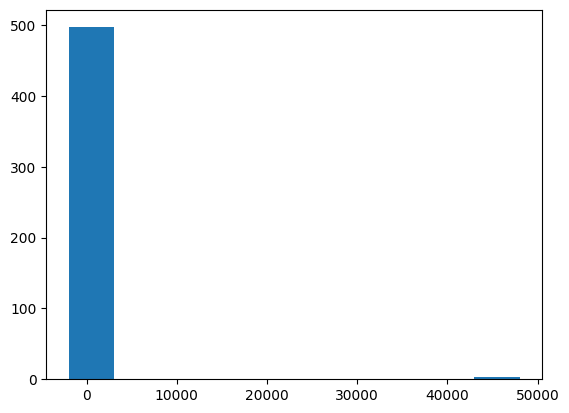

In [53]:
# plot the expectation
winnings = [] 

for i in range(500):

    # buy lotto
    tickets = {"you": np.array([draw(L, s) for i in range(e)]),
               "others": np.array([draw(L, s) for i in range(n)])}
    # tickets['you'][:10], tickets['others'][:10]

    # draw
    result = draw(L, s)
    you_win = int(result in tickets['you'])
    count_others_win = len(np.argwhere(tickets['others'] == result))

    if you_win + count_others_win == 0:
        winnings += [0 - e * p]
    else:
        winning = you_win * Z / (you_win + count_others_win) - e * p
        winnings += [winning]

print(np.mean(winnings))
plt.hist(winnings)